# Importing the packages and data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.special import gamma, digamma, polygamma
import math

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import random

import scipy.optimize
from scipy.stats import ttest_ind
from scipy.optimize import Bounds
from sklearn.preprocessing import StandardScaler

from prettytable import PrettyTable

In [3]:
import multiprocessing

In [4]:
multiprocessing.cpu_count()

8

In [5]:
import dirichlet_regression

In [77]:
# sur mon ordi perso:
scipy.__version__

'1.4.1'

In [6]:
def cos_similarity(x1,x2):
    return(np.mean([np.dot(x1[i],x2[i])/(np.linalg.norm(x1[i])*np.linalg.norm(x2[i])) for i in range(len(x1))]))

# Loading Dataset

In [7]:
Y_occitanie = pd.read_csv('Data Dirichlet/occitanie/Y_occitanie.csv', sep=';')

In [8]:
X_occitanie = pd.read_csv('Data Dirichlet/occitanie/X_occitanie.csv', sep=';')

In [9]:
X_occitanie = X_occitanie.iloc[:,1:]
X_occitanie = X_occitanie.iloc[:,:-1]

In [10]:
coordinates = pd.read_csv('Data Dirichlet/occitanie/coordinates_cendroids.csv', sep=';')
distance_matrix = scipy.spatial.distance_matrix(coordinates,coordinates)

In [76]:
X_occitanie

,POP,age_mineur,age_1824,age_2540,age_4055,age_5564,age_65,PIMP13,MED13,NBMENFISC13,...,P14_RP,no_diplom,capbep,bac,diplom_sup,french,foreign,unemp_rate,employ_evol,owner_rate
0,10686.00000,1745.432828,633.702526,1519.569182,2022.546303,1637.837488,3126.911673,1534.935651,17225.92056,3281.000000,...,5500.369754,3084.717115,2060.336850,1491.085449,1959.678274,10175.94126,510.058743,0.146153,-1.069783,0.613769
1,13248.00000,2609.587595,629.992708,1880.992367,2713.380702,2161.124558,3252.922069,1114.436913,16809.71966,2669.000000,...,6097.677242,3744.620133,2624.381082,1815.069962,2178.892325,12472.42430,775.575696,0.149798,-1.986204,0.700856
2,13304.00000,3212.791456,779.945838,2402.657503,2871.416012,1518.065046,2519.124145,1621.879453,18847.56366,3449.000000,...,5584.441924,3092.683829,2659.588509,1821.080501,2154.021975,12857.59935,446.400655,0.119585,0.215514,0.657686
3,15448.38045,3236.015033,1332.042735,2472.243775,3062.868917,1930.683069,3414.526923,3381.464244,17087.33333,7263.674412,...,7430.553567,3988.595203,2507.078388,2172.484668,2919.694058,14257.99939,1190.381062,0.184913,-0.684689,0.463652
4,20618.51872,4469.611276,1502.609556,3212.323704,4271.437340,2738.220953,4424.315890,3596.385003,18267.50694,7329.416378,...,9505.163850,4785.628253,3539.881007,2999.019653,4096.806972,19392.86290,1225.655818,0.161466,-0.649563,0.562317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,14631.00000,3195.583294,757.466782,2371.208971,3139.218175,2098.865160,3068.657619,606.473438,18890.51048,1281.000000,...,6181.909232,4025.455333,3042.238466,1944.329025,2108.219105,14187.17388,443.826118,0.105342,-0.239769,0.752094
203,13558.00000,2588.237464,577.301835,1746.944956,2768.136801,2158.324794,3719.054149,422.444210,17457.72775,951.000000,...,6112.864148,3769.506710,2844.033122,1912.696566,2222.628774,12573.17884,984.821162,0.118216,0.014046,0.755715
204,18862.00000,4648.579189,977.759331,3311.970574,4315.356878,2403.994498,3204.339530,697.987952,19849.47189,1413.000000,...,7438.455341,4130.059689,3772.243391,2526.645881,3347.924377,18149.95052,712.049477,0.110703,0.979463,0.768029
205,13364.00000,2627.010920,834.264654,1990.070382,2757.346600,1930.498564,3224.808880,1009.300645,17756.25360,2328.000000,...,5959.795988,4304.060809,2769.575874,1609.658404,1751.410833,12536.14180,827.858196,0.141431,0.630300,0.647832


# Performing the Dirichlet regression

In [11]:
X = np.array(X_occitanie)
Y = np.array(Y_occitanie)

In [12]:
Z = np.ones((207,1))
gamma_0 = [0.]

In [13]:
X = StandardScaler().fit(X).transform(X)

In [14]:
n,K = X.shape
J = Y.shape[1]

## Without spatial

### Common parameterization

In [15]:
%%time
dirichRegressor = dirichlet_regression.dirichletRegressor()
dirichRegressor.fit(X, Y, parametrization='common')

Optimization terminated successfully.
Wall time: 296 ms


In [18]:
r2_score(Y,dirichRegressor.mu)

0.008678573658029709

In [19]:
%%time
dirichRegressor = dirichlet_regression.dirichletRegressor()
dirichRegressor.fit(X, Y, parametrization='common', regularization=0.001)

Optimization terminated successfully.
Wall time: 91.6 ms


In [20]:
r2_score(Y,dirichRegressor.mu)

-0.008403176027556136

### Alternative parameterization

#### Cross-entropy

In [16]:
%%time
dirichRegressor = dirichlet_regression.dirichletRegressor()
dirichRegressor.fit(X, Y, parametrization='alternative', gamma_0=gamma_0, Z=Z, loss='crossentropy')

Optimization terminated successfully.
Wall time: 233 ms


In [18]:
print('R2:',r2_score(Y,dirichRegressor.mu))
print('RMSE:',mean_squared_error(Y,dirichRegressor.mu,squared=False))
print('Cross-entropy:',1/n*np.sum(Y*np.log(dirichRegressor.mu)))
print('Cos similarity:',cos_similarity(Y,dirichRegressor.mu))

R2: 0.49389895394975863
RMSE: 0.07906618815447364
Cross-entropy: -1.0476625611885417
Cos similarity: 0.9750492739219436


#### Likelihood Dirichlet

In [26]:
%%time
dirichRegressor = dirichlet_regression.dirichletRegressor()
dirichRegressor.fit(X, Y, parametrization='alternative', gamma_0=gamma_0, Z=Z)

Optimization terminated successfully.
Wall time: 78.9 ms


In [27]:
len(dirichRegressor.beta.flatten())+len(dirichRegressor.gamma.flatten())

53

In [28]:
print('R2:',r2_score(Y,dirichRegressor.mu))
print('RMSE:',mean_squared_error(Y,dirichRegressor.mu,squared=False))
print('Cross-entropy:',1/n*np.sum(Y*np.log(dirichRegressor.mu)))
print('AIC:',-2*dirichlet_regression.dirichlet_loglikelihood(dirichRegressor.mu,dirichRegressor.phi,Y)+2*53)
print('Cos similarity:',cos_similarity(Y,dirichRegressor.mu))

R2: 0.48723045299200196
RMSE: 0.07963911610322184
Cross-entropy: -1.0480568140980966
AIC: -862.1475558633775
Cos similarity: 0.9747792063178605


In [29]:
loglik_ns = dirichlet_regression.dirichlet_loglikelihood(dirichRegressor.mu,dirichRegressor.phi,Y)

In [57]:
%%time
l_lambda = [0, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]
l_r2 = []
l_similarity = []
for lambda_reg in l_lambda:
    reg = dirichlet_regression.dirichletRegressor()
    reg.fit(X, Y, parametrization='alternative', gamma_0=gamma_0, Z=Z, regularization=lambda_reg)
    l_r2.append(r2_score(Y,reg.mu))
    l_similarity.append(cos_similarity(Y,reg.mu))

Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Desired error not necessarily achieved due to precision loss.
Wall time: 13.5 s


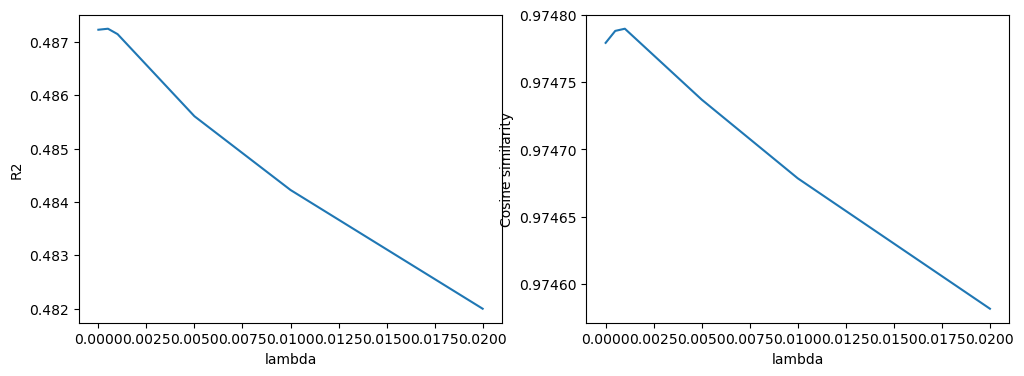

In [69]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(l_lambda[:6], l_r2[:6])
ax[0].set_xlabel("lambda")
ax[0].set_ylabel("R2")

ax[1].plot(l_lambda[:6], l_similarity[:6])
ax[1].set_xlabel("lambda")
ax[1].set_ylabel("Cosine similarity")

plt.show()

In [140]:
%%time
l_lambda = [0, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.0012, 0.0015]
l_r2 = []
l_similarity = []
for lambda_reg in l_lambda:
    reg = dirichlet_regression.dirichletRegressor()
    reg.fit(X, Y, parametrization='alternative', gamma_0=gamma_0, Z=Z, regularization=lambda_reg, verbose=False)
    l_r2.append(r2_score(Y,reg.mu))
    l_similarity.append(cos_similarity(Y,reg.mu))

Wall time: 11.2 s


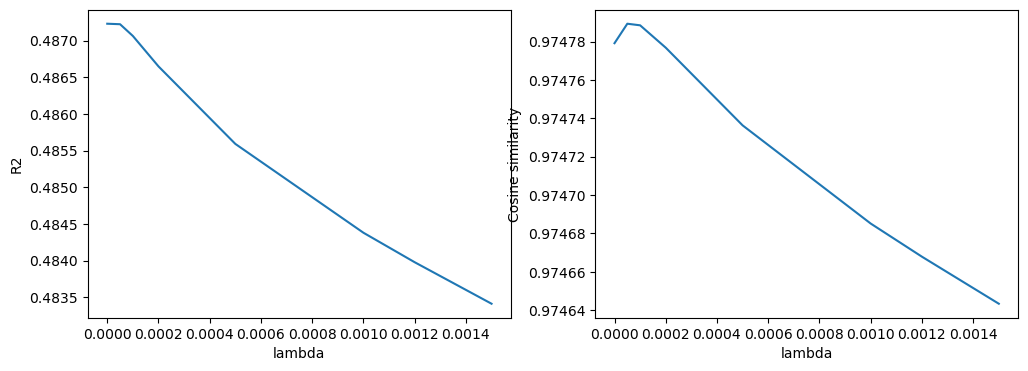

In [141]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(l_lambda, l_r2)
ax[0].set_xlabel("lambda")
ax[0].set_ylabel("R2")

ax[1].plot(l_lambda, l_similarity)
ax[1].set_xlabel("lambda")
ax[1].set_ylabel("Cosine similarity")

plt.show()

In [142]:
%%time
dirichRegressor = dirichlet_regression.dirichletRegressor()
dirichRegressor.fit(X, Y, parametrization='alternative', gamma_0=gamma_0, Z=Z, regularization=0.0001)

Optimization terminated successfully.
Wall time: 1.7 s


In [143]:
r2_score(Y,dirichRegressor.mu)

0.4870634944836385

### With Z a copy of X

In [35]:
Z_bis = np.ones((n,K+1))
Z_bis[:,1:] = np.copy(X)
gamma_0_bis = np.zeros(K+1)

In [33]:
%%time
dirichRegressor = dirichlet_regression.dirichletRegressor()
dirichRegressor.fit(X, Y, parametrization='alternative', gamma_0=gamma_0_bis, Z=Z_bis)

Optimization terminated successfully.
Wall time: 728 ms


In [34]:
print('R2:',r2_score(Y,dirichRegressor.mu))
print('RMSE:',mean_squared_error(Y,dirichRegressor.mu,squared=False))
print('Cross-entropy:',1/n*np.sum(Y*np.log(dirichRegressor.mu)))
print('AIC:',-2*dirichlet_regression.dirichlet_loglikelihood(dirichRegressor.mu,dirichRegressor.phi,Y)+2*53)
print('Cos similarity:',cos_similarity(Y,dirichRegressor.mu))

R2: 0.3193164022128876
RMSE: 0.091837727405686
Cross-entropy: -1.0577913481992816
AIC: -1010.6080870982678
Cos similarity: 0.9669906078831969


## With spatial

### Distance

In [20]:
W = np.copy(distance_matrix)
W[W > 35000] = 0

In [21]:
# inverse distance
W[W>0] = 1/W[W>0]

# row-normalize
W = W/W.sum(axis=1)[:,None]

In [17]:
np.mean([np.sum(W[i]!=0) for i in range(207)])

12.096618357487923

In [21]:
%%time
dirichRegressor_s1 = dirichlet_regression.dirichletRegressor(spatial=True, maxiter=5000, maxfun=500000)
dirichRegressor_s1.fit(X, Y, W=W, parametrization='alternative', gamma_0=gamma_0, Z=Z)

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Wall time: 6min 54s


In [22]:
print('R2:',r2_score(Y,dirichRegressor_s1.mu))
print('RMSE:',mean_squared_error(Y,dirichRegressor_s1.mu,squared=False))
print('Cross-entropy:',1/n*np.sum(Y*np.log(dirichRegressor_s1.mu)))
print('AIC:',-2*dirichlet_regression.dirichlet_loglikelihood(dirichRegressor_s1.mu,dirichRegressor_s1.phi,Y)+2*54)
print('Cos similarity:',cos_similarity(Y,dirichRegressor_s1.mu))

R2: 0.6017535644265538
RMSE: 0.07028598496004702
Cross-entropy: -1.041268326000523
AIC: -965.0562215604734
Cos similarity: 0.9803216275972075


In [23]:
dirichRegressor_s1.rho

0.9697309356468138

In [24]:
loglik_s1 = dirichlet_regression.dirichlet_loglikelihood(dirichRegressor_s1.mu,dirichRegressor_s1.phi,Y)

In [30]:
# LR ratio test
LR_statistic = -2*(loglik_ns-loglik_s1)
p_value = scipy.stats.chi2.sf(LR_statistic, 1)
print(p_value)

1.2789737647635491e-24


#### Cross-entropy

In [22]:
%%time
dirichRegressor_s1_ce = dirichlet_regression.dirichletRegressor(spatial=True, maxiter=5000, maxfun=500000)
dirichRegressor_s1_ce.fit(X, Y, W=W, parametrization='alternative', gamma_0=gamma_0, Z=Z, loss='crossentropy')

Optimization terminated successfully.
Wall time: 4.05 s


In [23]:
print('R2:',r2_score(Y,dirichRegressor_s1_ce.mu))
print('RMSE:',mean_squared_error(Y,dirichRegressor_s1_ce.mu,squared=False))
print('Cross-entropy:',1/n*np.sum(Y*np.log(dirichRegressor_s1_ce.mu)))
print('Cos similarity:',cos_similarity(Y,dirichRegressor_s1_ce.mu))

R2: 0.6076622614589268
RMSE: 0.06974743321157013
Cross-entropy: -1.0410128046804528
Cos similarity: 0.9806377528462559


### Contiguity

In [24]:
W_occitanie = pd.read_csv('Data Dirichlet/occitanie/W_elections_5nn.csv', sep=' ', header=None)

In [23]:
W_occitanie_10 = pd.read_csv('Data Dirichlet/occitanie/W_elections_10nn.csv', sep=' ', header=None)

In [25]:
W = np.array(W_occitanie)

In [33]:
%%time
dirichRegressor_s2 = dirichlet_regression.dirichletRegressor(spatial=True, maxiter=5000, maxfun=500000)
dirichRegressor_s2.fit(X, Y, W=W, parametrization='alternative', gamma_0=gamma_0, Z=Z)

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Wall time: 4min 13s


In [34]:
print('R2:',r2_score(Y,dirichRegressor_s2.mu))
print('RMSE:',mean_squared_error(Y,dirichRegressor_s2.mu,squared=False))
print('Cross-entropy:',1/n*np.sum(Y*np.log(dirichRegressor_s2.mu)))
print('AIC:',-2*dirichlet_regression.dirichlet_loglikelihood(dirichRegressor_s2.mu,dirichRegressor_s2.phi,Y)+2*54)
print('Cos similarity:',cos_similarity(Y,dirichRegressor_s2.mu))

R2: 0.5824337362914216
RMSE: 0.07196468238228139
Cross-entropy: -1.0422946631295709
AIC: -947.3947266731657
Cos similarity: 0.9794626693901682


In [37]:
dirichRegressor_s2.rho

0.9126513079295024

In [35]:
loglik_s2 = dirichlet_regression.dirichlet_loglikelihood(dirichRegressor_s2.mu,dirichRegressor_s2.phi,Y)

In [36]:
# LR ratio test
LR_statistic = -2*(loglik_ns-loglik_s2)
p_value = scipy.stats.chi2.sf(LR_statistic, 1)
print(p_value)

9.577218194072596e-21


#### Cross-entropy

In [26]:
%%time
dirichRegressor_s2_ce = dirichlet_regression.dirichletRegressor(spatial=True, maxiter=5000, maxfun=500000)
dirichRegressor_s2_ce.fit(X, Y, W=W, parametrization='alternative', gamma_0=gamma_0, Z=Z, loss='crossentropy')

Optimization terminated successfully.
Wall time: 4.77 s


In [27]:
print('R2:',r2_score(Y,dirichRegressor_s2_ce.mu))
print('RMSE:',mean_squared_error(Y,dirichRegressor_s2_ce.mu,squared=False))
print('Cross-entropy:',1/n*np.sum(Y*np.log(dirichRegressor_s2_ce.mu)))
print('Cos similarity:',cos_similarity(Y,dirichRegressor_s2_ce.mu))

R2: 0.5888271642571125
RMSE: 0.07139000585286227
Cross-entropy: -1.042003612219453
Cos similarity: 0.979788962001011
